In [1]:
! pip install opencv-python



In [9]:
! pip install ultralytics


  Using cached ultralytics-8.3.107-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
Using cached ultralytics-8.3.107-py3-none-any.whl (974 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/12.6 MB 10.8 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/12.6 MB 10.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.6 MB 10.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.9/12.6 MB 10.1 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.6 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------  12.3/12.6 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/41.0 MB 9.2 MB/s eta 0:00:05
   --- -------------------------

  You can safely remove it manually.
  You can safely remove it manually.


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
import glob

Label file content:
0 0.4343946092059604 0.9434629300604517 0.04411362667090888 0.03175907733927232
0 0.9844593385582776 0.8100008281349028 0.012718176002545078 0.018895450668363623


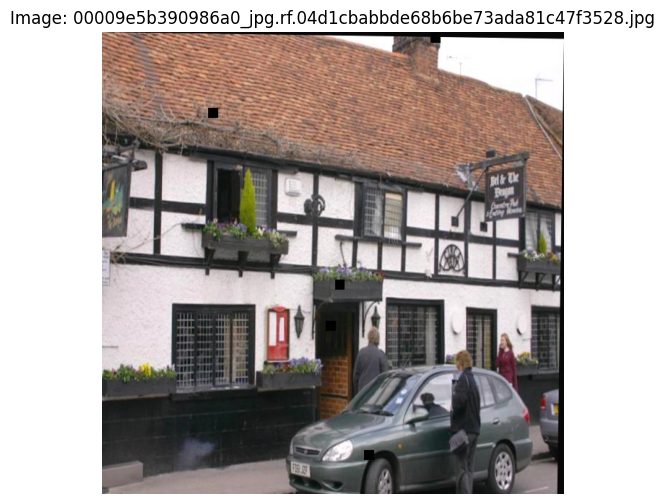

In [4]:


import os
import matplotlib.pyplot as plt
import cv2

dataset_path = r"C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8"
train_path = os.path.join(dataset_path, "train")
image_folder = os.path.join(train_path, "images")
label_folder = os.path.join(train_path, "labels")


image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

if not image_files:
    print("No images found in the dataset!")
else:
   
    image_name = image_files[0]
    image_path = os.path.join(image_folder, image_name)
    label_path = os.path.join(label_folder, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))

  
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image: {image_name}")

  
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            labels = f.readlines()
        print("Label file content:")
        for line in labels:
            print(line.strip())
    else:
        print("No label file found for this image.")

    plt.show()

In [1]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data=r"C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\data.yaml",
    epochs=100,               # Max cap
    imgsz=640,
    patience=10,              # Stop if no improvement after 10 epochs
    name="yolov8_license_plate"
)

Ultralytics 8.3.107  Python-3.13.3 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_license_plate8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\train\labels.cache... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:00<?, ?it/s]
val: Scanning C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\valid\labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolov8_license_plate8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\yolov8_license_plate8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.04G      1.228      1.549      1.226         11        640: 100%|██████████| 1324/1324 [02:30<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.48it/s]


                   all       2046       2132       0.96      0.919      0.954      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.36G      1.219     0.8295      1.212         11        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.60it/s]

                   all       2046       2132      0.952      0.891      0.943      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.36G       1.26     0.8057      1.252          9        640: 100%|██████████| 1324/1324 [02:21<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.51it/s]

                   all       2046       2132      0.929      0.877      0.918      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.36G      1.268      0.783      1.271          5        640: 100%|██████████| 1324/1324 [02:20<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.25it/s]

                   all       2046       2132      0.964      0.912      0.957      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      1.239     0.7287      1.258          8        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.43it/s]

                   all       2046       2132      0.957      0.925      0.961      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.36G      1.208     0.6871      1.238         11        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.40it/s]

                   all       2046       2132      0.964      0.922      0.959      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      1.186     0.6622       1.23         14        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.46it/s]

                   all       2046       2132      0.967      0.925      0.961      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.36G      1.175     0.6386      1.219          9        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.40it/s]

                   all       2046       2132      0.972      0.936      0.969      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G      1.163     0.6241      1.212          6        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.45it/s]

                   all       2046       2132      0.968      0.936      0.967      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G      1.143     0.6072      1.206          9        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.45it/s]

                   all       2046       2132      0.969      0.941      0.974      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G       1.14     0.5931      1.202          7        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.39it/s]

                   all       2046       2132      0.967       0.94      0.973      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G      1.133     0.5908      1.196          8        640: 100%|██████████| 1324/1324 [02:21<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.61it/s]

                   all       2046       2132      0.973      0.946      0.974      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G       1.12     0.5852       1.19         14        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.41it/s]

                   all       2046       2132      0.971      0.941      0.973      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G      1.115     0.5727      1.182          4        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.51it/s]

                   all       2046       2132      0.966      0.947      0.971      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G      1.112      0.568      1.181          6        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.47it/s]

                   all       2046       2132      0.974      0.943      0.973      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G      1.102     0.5585      1.174          6        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.47it/s]

                   all       2046       2132      0.974      0.945      0.977      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G      1.093     0.5503      1.168          5        640: 100%|██████████| 1324/1324 [02:21<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.50it/s]

                   all       2046       2132      0.978      0.949      0.979       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G      1.089     0.5424      1.166          6        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.47it/s]

                   all       2046       2132      0.976      0.947      0.976      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G      1.096     0.5453       1.17         10        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.59it/s]

                   all       2046       2132      0.975      0.953       0.98      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G      1.081     0.5327      1.162          8        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.54it/s]

                   all       2046       2132      0.975      0.953      0.981      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G      1.075     0.5288      1.161          5        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.49it/s]

                   all       2046       2132       0.97      0.953      0.979      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G      1.076      0.526      1.161          8        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.50it/s]

                   all       2046       2132      0.977      0.955      0.982       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.36G      1.072     0.5258      1.157         13        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.56it/s]

                   all       2046       2132      0.974      0.958      0.981       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.36G      1.067     0.5193      1.154          3        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.61it/s]

                   all       2046       2132      0.976      0.961      0.982      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G      1.058     0.5148      1.149         12        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.54it/s]

                   all       2046       2132      0.977      0.958      0.981      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      1.053     0.5069      1.142         10        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.39it/s]

                   all       2046       2132      0.978      0.955      0.982      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G      1.058     0.5071      1.149          8        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.54it/s]

                   all       2046       2132      0.977       0.96      0.983      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.36G      1.046     0.5037       1.14          9        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.54it/s]

                   all       2046       2132      0.979      0.955      0.982      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G      1.054     0.5002      1.143          7        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.62it/s]

                   all       2046       2132      0.978      0.959      0.984      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G      1.046      0.498      1.142          7        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.50it/s]

                   all       2046       2132       0.98      0.956      0.982      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G      1.041     0.4964      1.137         11        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.48it/s]

                   all       2046       2132      0.977      0.956      0.981      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.36G      1.039      0.495      1.136          6        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.48it/s]

                   all       2046       2132      0.981      0.955      0.983      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G      1.036     0.4896      1.137          9        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.52it/s]

                   all       2046       2132      0.978      0.956      0.984      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G      1.032     0.4847       1.13          8        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.52it/s]

                   all       2046       2132      0.978      0.959      0.982        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G      1.025     0.4843      1.131         13        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.48it/s]

                   all       2046       2132       0.98      0.959      0.984      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.36G      1.025     0.4785      1.127          9        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.58it/s]

                   all       2046       2132      0.977      0.963      0.984        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.36G      1.021     0.4781      1.127          9        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.56it/s]

                   all       2046       2132      0.974      0.967      0.983      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G      1.022     0.4748      1.126         10        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.51it/s]

                   all       2046       2132      0.976      0.967      0.985      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.36G      1.017     0.4713      1.123         10        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.46it/s]

                   all       2046       2132      0.978      0.964      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.36G      1.019     0.4688      1.124          5        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.46it/s]

                   all       2046       2132      0.976      0.967      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G      1.013     0.4698      1.119         11        640: 100%|██████████| 1324/1324 [02:21<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.52it/s]

                   all       2046       2132      0.979      0.965      0.984      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.36G      1.009     0.4662       1.12         10        640: 100%|██████████| 1324/1324 [02:19<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.43it/s]

                   all       2046       2132      0.978      0.966      0.984      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.36G      1.005     0.4642      1.117          9        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.47it/s]

                   all       2046       2132      0.979      0.966      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G      1.004     0.4637      1.112          5        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.47it/s]

                   all       2046       2132      0.978      0.967      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G      1.003     0.4627      1.112          4        640: 100%|██████████| 1324/1324 [02:24<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.47it/s]

                   all       2046       2132       0.98      0.963      0.985      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.36G          1     0.4597      1.116         10        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.43it/s]

                   all       2046       2132      0.976      0.967      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G     0.9911      0.453      1.107         11        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.54it/s]

                   all       2046       2132      0.975      0.968      0.985      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G     0.9928     0.4549      1.112          5        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.46it/s]

                   all       2046       2132      0.976      0.968      0.985      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G     0.9902     0.4526      1.109          8        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.43it/s]

                   all       2046       2132      0.975      0.971      0.985      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.36G     0.9876     0.4485      1.107          8        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.50it/s]

                   all       2046       2132      0.975      0.971      0.985      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G      0.986     0.4495      1.105          5        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.48it/s]

                   all       2046       2132      0.975      0.972      0.985      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G     0.9846     0.4462      1.107         12        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.52it/s]

                   all       2046       2132      0.974      0.972      0.985      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.9782     0.4442      1.108          9        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.57it/s]

                   all       2046       2132      0.976      0.971      0.986      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.36G     0.9791     0.4418      1.101          9        640: 100%|██████████| 1324/1324 [02:32<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.57it/s]

                   all       2046       2132      0.977      0.969      0.986      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G     0.9706     0.4382        1.1          9        640: 100%|██████████| 1324/1324 [02:33<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.35it/s]

                   all       2046       2132      0.976      0.969      0.986      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.36G     0.9743     0.4391      1.099          8        640: 100%|██████████| 1324/1324 [02:42<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.55it/s]

                   all       2046       2132       0.98      0.965      0.986      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G     0.9684     0.4358      1.096          9        640: 100%|██████████| 1324/1324 [02:29<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.75it/s]

                   all       2046       2132      0.976      0.969      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G     0.9665     0.4352      1.097          5        640: 100%|██████████| 1324/1324 [02:23<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.40it/s]

                   all       2046       2132       0.98      0.965      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.36G     0.9651     0.4314      1.096          7        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.66it/s]

                   all       2046       2132      0.975       0.97      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.36G     0.9569      0.429       1.09          7        640: 100%|██████████| 1324/1324 [02:22<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.58it/s]

                   all       2046       2132      0.975      0.969      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G      0.953     0.4301      1.092          8        640: 100%|██████████| 1324/1324 [04:20<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.33it/s]

                   all       2046       2132      0.975      0.969      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G     0.9528     0.4249      1.091          7        640: 100%|██████████| 1324/1324 [05:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.43it/s]

                   all       2046       2132      0.975      0.969      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.36G     0.9523     0.4266       1.09         10        640: 100%|██████████| 1324/1324 [05:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.22it/s]

                   all       2046       2132      0.975      0.969      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.36G     0.9474     0.4218      1.082          5        640: 100%|██████████| 1324/1324 [05:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.39it/s]

                   all       2046       2132       0.98      0.965      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.36G       0.94     0.4193       1.08         10        640: 100%|██████████| 1324/1324 [05:13<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.38it/s]

                   all       2046       2132      0.979      0.965      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G     0.9426     0.4198      1.081          8        640: 100%|██████████| 1324/1324 [05:14<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.35it/s]

                   all       2046       2132       0.98      0.965      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G     0.9405     0.4173      1.079          9        640: 100%|██████████| 1324/1324 [05:14<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.37it/s]

                   all       2046       2132       0.98      0.965      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.36G     0.9414     0.4178      1.084         11        640: 100%|██████████| 1324/1324 [04:56<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.60it/s]

                   all       2046       2132      0.982      0.965      0.986      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.36G     0.9326     0.4109      1.078          9        640: 100%|██████████| 1324/1324 [04:46<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.67it/s]

                   all       2046       2132      0.982      0.965      0.986      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G     0.9302     0.4091      1.074          7        640: 100%|██████████| 1324/1324 [04:40<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.22it/s]

                   all       2046       2132      0.982      0.965      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.36G     0.9276     0.4064      1.073          9        640: 100%|██████████| 1324/1324 [04:38<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.14it/s]

                   all       2046       2132      0.981      0.965      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.36G     0.9228     0.4064      1.072          6        640: 100%|██████████| 1324/1324 [02:27<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.13it/s]

                   all       2046       2132      0.982      0.965      0.985      0.708
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 62, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



72 epochs completed in 3.551 hours.
Optimizer stripped from runs\detect\yolov8_license_plate8\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\yolov8_license_plate8\weights\best.pt, 6.3MB

Validating runs\detect\yolov8_license_plate8\weights\best.pt...
Ultralytics 8.3.107  Python-3.13.3 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:09<00:00,  7.07it/s]


                   all       2046       2132      0.975      0.969      0.985      0.708
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\yolov8_license_plate8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001587C47A120>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import glob


model = YOLO(r"C:\Users\bhuva\OneDrive\Desktop\ml porj\runs\detect\yolov8_license_plate8\weights\bestv8.pt")

test_images_folder = r"C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\test\images"

image_paths = glob.glob(os.path.join(test_images_folder, "*.jpg"))[:100]

for img_path in image_paths:
    results = model(img_path)  

    for r in results:
        img = r.plot()  
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Detected: {os.path.basename(img_path)}")
        plt.show()



image 1/1 C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\test\images\0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 2 License_Plates, 6.8ms
Speed: 2.3ms preprocess, 6.8ms inference, 71.6ms postprocess per image at shape (1, 3, 640, 640)


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [1]:
from ultralytics import YOLO

# Load YOLOv12n model
model = YOLO("yolov12n.pt")

# Train with different name to avoid overwrite
model.train(
    data=r"C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\data.yaml",
    epochs=100,
    imgsz=640,
    patience=10, 
    name="yolov12_license_plate"
)

New https://pypi.org/project/ultralytics/8.3.108 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.107  Python-3.13.3 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov12n.pt, data=C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov12_license_plate3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fals

train: Scanning C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\train\labels.cache... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:00<?, ?it/s]
val: Scanning C:\Users\bhuva\OneDrive\Desktop\ml porj\License Plate Recognition.v4-resized640_aug3x-accurate.yolov8\valid\labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolov12_license_plate3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\yolov12_license_plate3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.35G      1.306      1.825      1.191         11        640: 100%|██████████| 1324/1324 [04:37<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.41it/s]


                   all       2046       2132      0.928      0.868      0.918      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.58G      1.247     0.8932      1.213         11        640: 100%|██████████| 1324/1324 [04:24<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.66it/s]

                   all       2046       2132      0.941      0.869      0.924      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.58G      1.282     0.8452      1.276          9        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.78it/s]

                   all       2046       2132      0.947      0.874      0.923      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.58G      1.284     0.8145      1.306          5        640: 100%|██████████| 1324/1324 [04:12<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.79it/s]

                   all       2046       2132      0.958      0.917      0.957      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.58G      1.251     0.7552      1.285          8        640: 100%|██████████| 1324/1324 [04:12<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.58it/s]

                   all       2046       2132      0.964      0.915      0.956      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.58G      1.224     0.7089      1.266         11        640: 100%|██████████| 1324/1324 [04:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.77it/s]

                   all       2046       2132      0.977      0.905      0.957      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.58G        1.2     0.6839      1.256         14        640: 100%|██████████| 1324/1324 [04:10<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]

                   all       2046       2132      0.961      0.925      0.962       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.58G      1.192      0.667      1.249          9        640: 100%|██████████| 1324/1324 [04:13<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.70it/s]

                   all       2046       2132      0.964      0.927      0.961      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.58G       1.18     0.6518       1.24          6        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.74it/s]

                   all       2046       2132      0.965      0.929      0.966      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.58G      1.164     0.6261      1.229          9        640: 100%|██████████| 1324/1324 [04:14<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]

                   all       2046       2132      0.967      0.934       0.97      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.58G      1.155     0.6177      1.224          7        640: 100%|██████████| 1324/1324 [04:10<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.89it/s]

                   all       2046       2132      0.966      0.935      0.968      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.58G       1.15     0.6122      1.214          8        640: 100%|██████████| 1324/1324 [04:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.48it/s]

                   all       2046       2132      0.968      0.941      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.58G       1.14     0.6008      1.209         14        640: 100%|██████████| 1324/1324 [04:18<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.73it/s]

                   all       2046       2132      0.972      0.939      0.973      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.58G      1.135     0.5937      1.207          4        640: 100%|██████████| 1324/1324 [04:13<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.75it/s]

                   all       2046       2132      0.971      0.945      0.974      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.58G      1.129     0.5884      1.204          6        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]

                   all       2046       2132      0.972      0.943      0.971      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.58G      1.125     0.5767      1.194          6        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.85it/s]

                   all       2046       2132      0.973      0.945      0.972      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.58G      1.113     0.5713      1.186          5        640: 100%|██████████| 1324/1324 [04:18<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.83it/s]

                   all       2046       2132      0.975      0.953      0.977      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.58G      1.109     0.5627      1.182          6        640: 100%|██████████| 1324/1324 [04:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.69it/s]

                   all       2046       2132      0.972      0.947      0.975       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.58G      1.111     0.5612      1.187         10        640: 100%|██████████| 1324/1324 [04:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.75it/s]

                   all       2046       2132       0.98      0.949      0.979      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.58G      1.097     0.5495      1.179          8        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.81it/s]

                   all       2046       2132      0.973      0.949      0.979      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.58G      1.092     0.5464      1.172          5        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.84it/s]

                   all       2046       2132      0.973      0.952      0.977      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.58G      1.093     0.5405      1.174          8        640: 100%|██████████| 1324/1324 [04:10<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.55it/s]

                   all       2046       2132      0.978      0.952       0.98      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.58G       1.09     0.5378      1.174         13        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.89it/s]

                   all       2046       2132      0.975      0.957      0.981      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.58G      1.087     0.5322      1.168          3        640: 100%|██████████| 1324/1324 [04:10<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]

                   all       2046       2132      0.981      0.946      0.975       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.58G      1.079     0.5265      1.165         12        640: 100%|██████████| 1324/1324 [04:09<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]

                   all       2046       2132       0.98       0.95      0.981      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.58G      1.073     0.5214      1.159         10        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.65it/s]

                   all       2046       2132      0.977      0.956      0.982      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.58G      1.079     0.5227      1.164          8        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.78it/s]

                   all       2046       2132      0.975      0.958      0.981      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.58G      1.066     0.5137      1.155          9        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.80it/s]

                   all       2046       2132      0.973      0.966      0.982      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.58G       1.07     0.5125      1.155          7        640: 100%|██████████| 1324/1324 [04:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]

                   all       2046       2132      0.984      0.954       0.98      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.58G      1.064     0.5075      1.153          7        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.78it/s]

                   all       2046       2132      0.981      0.953      0.981      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.58G       1.06     0.5077      1.153         11        640: 100%|██████████| 1324/1324 [04:17<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.74it/s]

                   all       2046       2132       0.98      0.954      0.981      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.58G      1.057     0.5059      1.152          6        640: 100%|██████████| 1324/1324 [04:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.79it/s]

                   all       2046       2132      0.978      0.955      0.982      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.58G      1.052     0.5014      1.149          9        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.89it/s]

                   all       2046       2132      0.986      0.951      0.982      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.58G      1.048      0.493      1.141          8        640: 100%|██████████| 1324/1324 [04:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.79it/s]

                   all       2046       2132      0.979      0.959      0.982      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.58G      1.042     0.4896      1.142         13        640: 100%|██████████| 1324/1324 [04:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.01it/s]

                   all       2046       2132      0.976      0.965      0.983        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.58G      1.046     0.4869       1.14          9        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.96it/s]

                   all       2046       2132      0.982      0.956      0.983        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.58G      1.036     0.4857       1.14          9        640: 100%|██████████| 1324/1324 [04:08<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.04it/s]

                   all       2046       2132      0.979      0.959      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.58G      1.035     0.4806      1.136         10        640: 100%|██████████| 1324/1324 [04:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]

                   all       2046       2132      0.982      0.958      0.984      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.58G      1.031     0.4768      1.135         10        640: 100%|██████████| 1324/1324 [04:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]

                   all       2046       2132      0.979       0.96      0.983      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.58G      1.033     0.4798      1.134          5        640: 100%|██████████| 1324/1324 [04:11<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]

                   all       2046       2132      0.982      0.955      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.58G      1.028     0.4755       1.13         11        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.06it/s]

                   all       2046       2132      0.981      0.955      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.58G      1.026     0.4726      1.131         10        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]

                   all       2046       2132       0.97      0.966      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.58G      1.021     0.4678      1.128          9        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]

                   all       2046       2132       0.97      0.966      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.58G       1.02      0.469      1.123          5        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.01it/s]

                   all       2046       2132      0.973      0.966      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.58G       1.02     0.4682      1.125          4        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.02it/s]

                   all       2046       2132       0.97       0.97      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.58G      1.017     0.4659      1.128         10        640: 100%|██████████| 1324/1324 [04:13<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]

                   all       2046       2132       0.97       0.97      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.58G      1.008     0.4617      1.119         11        640: 100%|██████████| 1324/1324 [04:13<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.97it/s]

                   all       2046       2132      0.971      0.969      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.58G      1.009     0.4575      1.124          5        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]

                   all       2046       2132      0.975      0.964      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.58G      1.004     0.4594      1.119          8        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]

                   all       2046       2132      0.976      0.964      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.58G      1.004     0.4577      1.118          8        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.04it/s]

                   all       2046       2132      0.976      0.965      0.984      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.58G      1.002     0.4541      1.115          5        640: 100%|██████████| 1324/1324 [04:33<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.06it/s]

                   all       2046       2132      0.975      0.965      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.58G     0.9977     0.4519      1.116         12        640: 100%|██████████| 1324/1324 [04:41<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]

                   all       2046       2132       0.98      0.962      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.58G      0.993     0.4524       1.12          9        640: 100%|██████████| 1324/1324 [04:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]

                   all       2046       2132       0.98      0.963      0.984      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.58G     0.9897     0.4463      1.112          9        640: 100%|██████████| 1324/1324 [04:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.96it/s]

                   all       2046       2132       0.98      0.961      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.58G     0.9871     0.4413       1.11          9        640: 100%|██████████| 1324/1324 [04:14<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.93it/s]

                   all       2046       2132      0.976      0.966      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.58G     0.9895     0.4447      1.111          8        640: 100%|██████████| 1324/1324 [04:10<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]

                   all       2046       2132      0.976      0.966      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.58G     0.9838     0.4417      1.107          9        640: 100%|██████████| 1324/1324 [04:31<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.17it/s]

                   all       2046       2132      0.975      0.966      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.58G     0.9849     0.4422      1.109          5        640: 100%|██████████| 1324/1324 [04:43<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.93it/s]

                   all       2046       2132      0.977      0.966      0.984      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.58G     0.9798     0.4382      1.105          7        640: 100%|██████████| 1324/1324 [04:54<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.06it/s]

                   all       2046       2132      0.979      0.963      0.984      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.58G     0.9721     0.4327        1.1          7        640: 100%|██████████| 1324/1324 [04:40<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.85it/s]

                   all       2046       2132       0.98      0.964      0.984      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.58G     0.9689     0.4334      1.104          8        640: 100%|██████████| 1324/1324 [04:14<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.50it/s]

                   all       2046       2132      0.979      0.964      0.984      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.58G     0.9666     0.4276      1.101          7        640: 100%|██████████| 1324/1324 [04:19<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.05it/s]

                   all       2046       2132      0.979      0.964      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.58G     0.9668     0.4288        1.1         10        640: 100%|██████████| 1324/1324 [04:55<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.13it/s]

                   all       2046       2132      0.979      0.965      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.58G     0.9614     0.4253      1.093          5        640: 100%|██████████| 1324/1324 [04:52<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.06it/s]

                   all       2046       2132      0.979      0.965      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.58G     0.9548     0.4226      1.091         10        640: 100%|██████████| 1324/1324 [04:53<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.05it/s]

                   all       2046       2132      0.978      0.965      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.58G      0.959     0.4235      1.091          8        640: 100%|██████████| 1324/1324 [04:54<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.03it/s]

                   all       2046       2132       0.98      0.964      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.58G     0.9524     0.4189      1.088          9        640: 100%|██████████| 1324/1324 [04:55<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  4.00it/s]

                   all       2046       2132      0.979      0.964      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.58G     0.9533     0.4183      1.091         11        640: 100%|██████████| 1324/1324 [04:57<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.01it/s]

                   all       2046       2132       0.98      0.964      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.58G     0.9465      0.412      1.087          9        640: 100%|██████████| 1324/1324 [04:54<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.06it/s]

                   all       2046       2132      0.981      0.964      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.58G     0.9451     0.4105      1.084          7        640: 100%|██████████| 1324/1324 [04:52<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.10it/s]

                   all       2046       2132      0.981      0.964      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.58G     0.9413     0.4067      1.084          9        640: 100%|██████████| 1324/1324 [04:49<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.14it/s]

                   all       2046       2132      0.979      0.965      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.58G      0.938     0.4075      1.086          6        640: 100%|██████████| 1324/1324 [04:53<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.19it/s]

                   all       2046       2132      0.979      0.965      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.58G     0.9243     0.4039      1.077         10        640: 100%|██████████| 1324/1324 [04:49<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.98it/s]

                   all       2046       2132      0.981      0.965      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.58G     0.9327     0.4031      1.081         12        640: 100%|██████████| 1324/1324 [04:52<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.12it/s]

                   all       2046       2132       0.98      0.965      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.58G     0.9266     0.4005      1.076         16        640: 100%|██████████| 1324/1324 [04:49<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.17it/s]

                   all       2046       2132      0.982      0.964      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.58G     0.9247     0.3999      1.075          9        640: 100%|██████████| 1324/1324 [04:53<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.99it/s]

                   all       2046       2132      0.982      0.964      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.58G     0.9209     0.3989      1.075         10        640: 100%|██████████| 1324/1324 [04:51<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.16it/s]

                   all       2046       2132      0.982      0.964      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.58G     0.9129     0.3968      1.072         15        640: 100%|██████████| 1324/1324 [04:48<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.10it/s]

                   all       2046       2132      0.982      0.963      0.984      0.709
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 68, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



78 epochs completed in 6.006 hours.
Optimizer stripped from runs\detect\yolov12_license_plate3\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\yolov12_license_plate3\weights\best.pt, 5.5MB

Validating runs\detect\yolov12_license_plate3\weights\best.pt...
Ultralytics 8.3.107  Python-3.13.3 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12n summary (fused): 159 layers, 2,526,971 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.88it/s]


                   all       2046       2132      0.981      0.964      0.984      0.709
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\yolov12_license_plate3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C19FB237E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

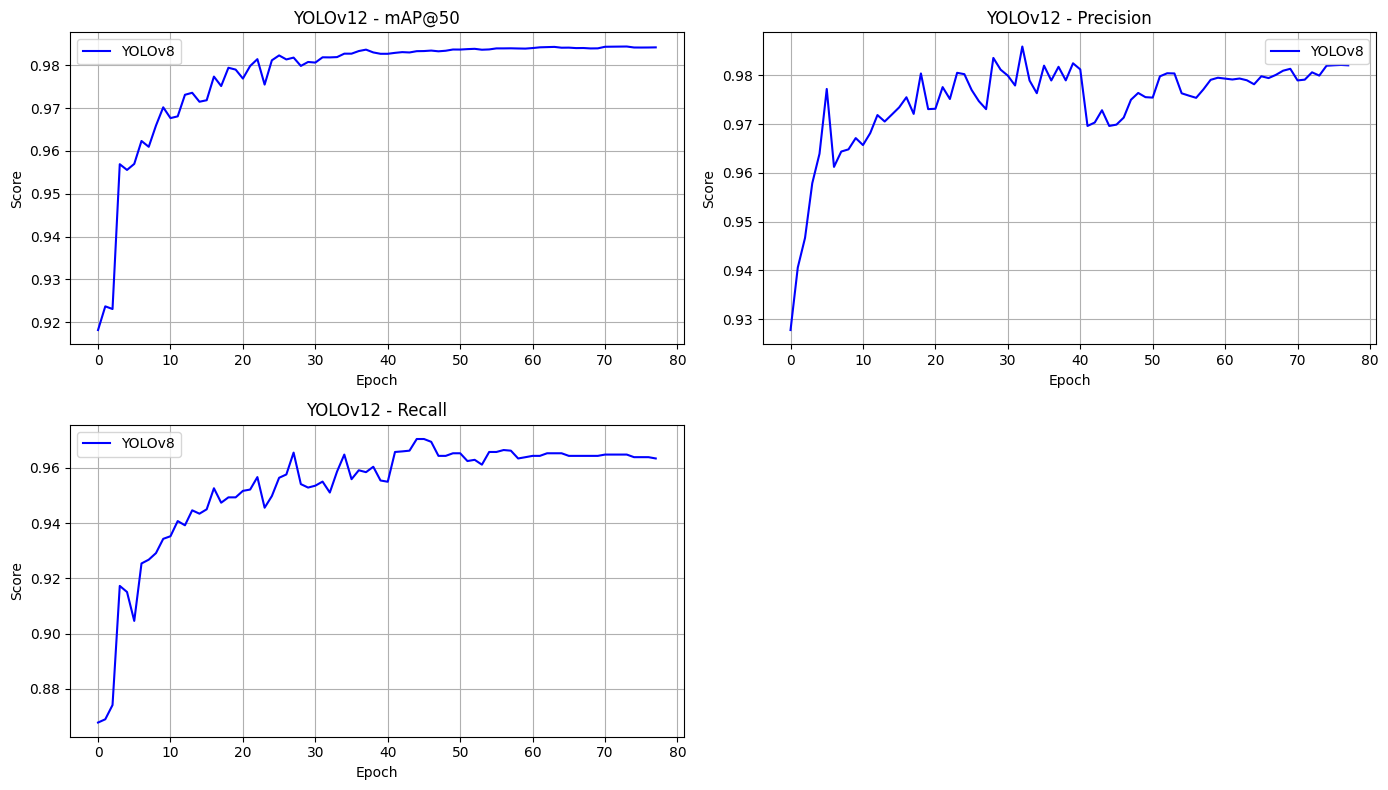

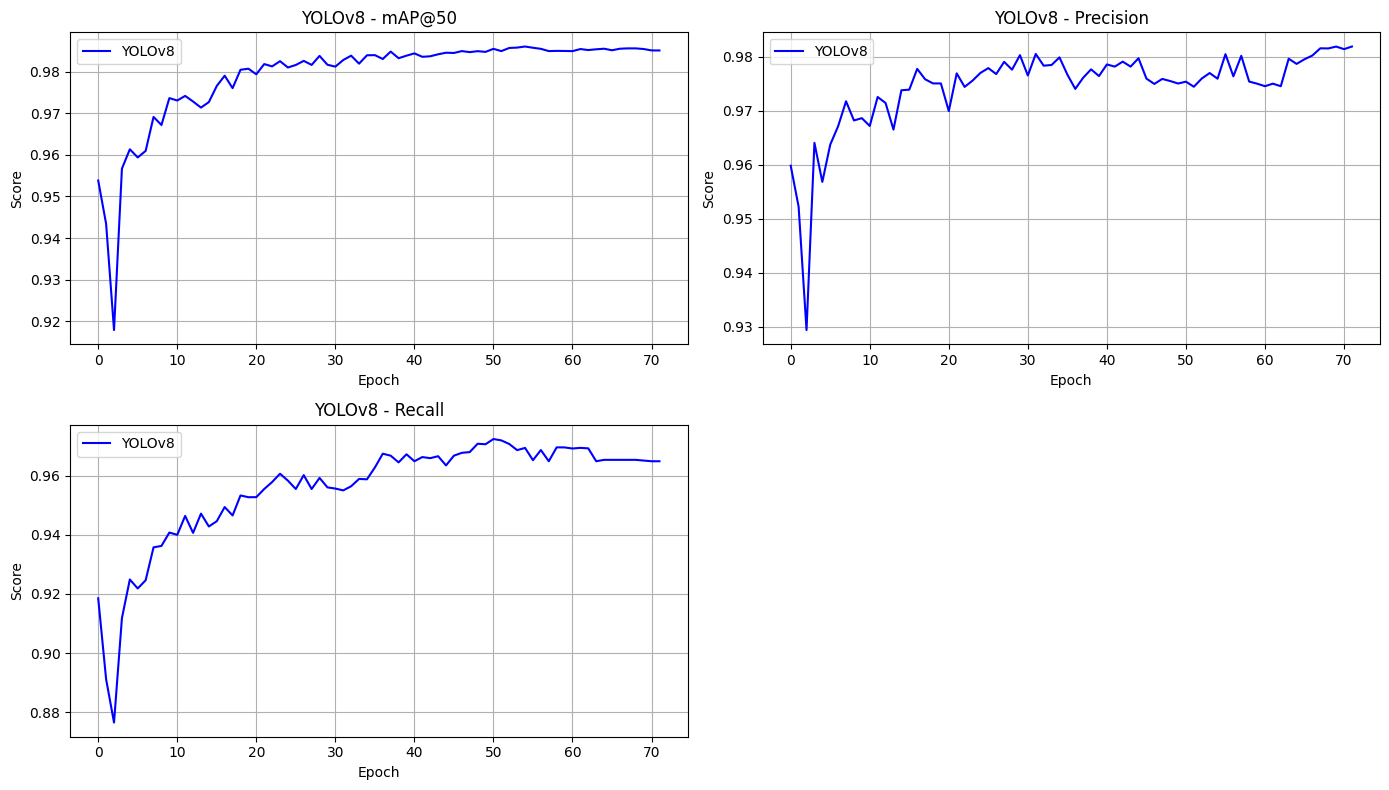

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load YOLOv8 results
yolo8_path = r"C:\Users\bhuva\OneDrive\Desktop\ml porj\runs\detect\yolov12_license_plate3\results.csv"
df8 = pd.read_csv(yolo8_path)

# Plotting for YOLOv8
plt.figure(figsize=(14, 8))

# mAP50
plt.subplot(2, 2, 1)
plt.plot(df8["metrics/mAP50(B)"], label="YOLOv8", color="blue")
plt.title("YOLOv12 - mAP@50")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(df8["metrics/precision(B)"], label="YOLOv8", color="blue")
plt.title("YOLOv12 - Precision")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(df8["metrics/recall(B)"], label="YOLOv8", color="blue")
plt.title("YOLOv12 - Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




yolo8_path = r"C:\Users\bhuva\OneDrive\Desktop\ml porj\runs\detect\yolov8_license_plate8\results.csv"
df8 = pd.read_csv(yolo8_path)

# Plotting for YOLOv8
plt.figure(figsize=(14, 8))

# mAP50
plt.subplot(2, 2, 1)
plt.plot(df8["metrics/mAP50(B)"], label="YOLOv8", color="blue")
plt.title("YOLOv8 - mAP@50")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(df8["metrics/precision(B)"], label="YOLOv8", color="blue")
plt.title("YOLOv8 - Precision")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(df8["metrics/recall(B)"], label="YOLOv8", color="blue")
plt.title("YOLOv8 - Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()